In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
import pandas as pd

data = {
    'Dataset': [
        'OLID', 'OLID', 'OLID', 'OLID',
        'TweetEval', 'TweetEval', 'TweetEval', 'TweetEval',
        'Sushil', 'Sushil', 'Sushil', 'Sushil'
    ],
    'Model': ['IB-WE', 'IB-ED', 'MB-WE', 'MB-ED'] * 3,
    'Accuracy': [0.73, 0.69, 0.76, 0.78, 0.60, 0.62, 0.46, 0.51, 0.74, 0.66, 0.68, 0.82],
    'Precision': [0.83, 0.69, 0.86, 0.93, 0.60, 0.60, 0.40, 0.50, 0.81, 0.82, 0.63, 0.89],
    'Recall': [0.56, 0.69, 0.63, 0.61, 0.63, 0.69, 0.12, 0.81, 0.62, 0.43, 0.84, 0.74],
    'F1-Score': [0.67, 0.69, 0.73, 0.74, 0.61, 0.64, 0.18, 0.62, 0.70, 0.56, 0.72, 0.81]
}

df_indo = pd.DataFrame(data)

df_indo = pd.concat([
    df_indo[df_indo['Dataset'] == 'TweetEval'],
    df_indo[df_indo['Dataset'] == 'OLID'],
    df_indo[df_indo['Dataset'] == 'Sushil']
], ignore_index=True)

df_indo


,Dataset,Model,Accuracy,Precision,Recall,F1-Score
0,TweetEval,IB-WE,0.60,0.60,0.63,0.61
1,TweetEval,IB-ED,0.62,0.60,0.69,0.64
2,TweetEval,MB-WE,0.46,0.40,0.12,0.18
3,TweetEval,MB-ED,0.51,0.50,0.81,0.62
4,OLID,IB-WE,0.73,0.83,0.56,0.67
5,OLID,IB-ED,0.69,0.69,0.69,0.69
6,OLID,MB-WE,0.76,0.86,0.63,0.73
7,OLID,MB-ED,0.78,0.93,0.61,0.74
8,Sushil,IB-WE,0.74,0.81,0.62,0.70
9,Sushil,IB-ED,0.66,0.82,0.43,0.56


In [11]:
# English Dataset Result
data_eng = {
    'Dataset': [
        'OLID', 'OLID', 'OLID', 'OLID',
        'TweetEval', 'TweetEval', 'TweetEval', 'TweetEval',
        'Sushil', 'Sushil', 'Sushil', 'Sushil'
    ],
    'Model': ['IB-WE', 'IB-ED', 'MB-WE', 'MB-ED'] * 3,
    'Accuracy': [0.69, 0.59, 0.77, 0.81, 0.58, 0.55, 0.57, 0.58, 0.68, 0.69, 0.82, 0.83],
    'Precision': [0.75, 0.63, 0.94, 0.93, 0.57, 0.53, 0.69, 0.87, 0.76, 0.77, 0.87, 0.88],
    'Recall': [0.57, 0.41, 0.58, 0.68, 0.70, 0.82, 0.26, 0.20, 0.54, 0.50, 0.76, 0.76],
    'F1-Score': [0.65, 0.50, 0.71, 0.78, 0.63, 0.65, 0.38, 0.33, 0.63, 0.60, 0.81, 0.82]
}

df_english = pd.DataFrame(data_eng)

df_english = pd.concat([
    df_english[df_english['Dataset'] == 'TweetEval'],
    df_english[df_english['Dataset'] == 'OLID'],
    df_english[df_english['Dataset'] == 'Sushil']
], ignore_index=True)

df_english

,Dataset,Model,Accuracy,Precision,Recall,F1-Score
0,TweetEval,IB-WE,0.58,0.57,0.70,0.63
1,TweetEval,IB-ED,0.55,0.53,0.82,0.65
2,TweetEval,MB-WE,0.57,0.69,0.26,0.38
3,TweetEval,MB-ED,0.58,0.87,0.20,0.33
4,OLID,IB-WE,0.69,0.75,0.57,0.65
5,OLID,IB-ED,0.59,0.63,0.41,0.50
6,OLID,MB-WE,0.77,0.94,0.58,0.71
7,OLID,MB-ED,0.81,0.93,0.68,0.78
8,Sushil,IB-WE,0.68,0.76,0.54,0.63
9,Sushil,IB-ED,0.69,0.77,0.50,0.60


In [12]:
df_indo.to_csv('result-indo.csv', index=False)
df_english.to_csv('result-english.csv', index=False)

In [13]:
def plot_colored_metrics_accessible(df, language):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    datasets = df['Dataset'].unique()
    
    visual_styles = {
        'OLID': {'color': 'skyblue', 'hatch': '///'},
        'TweetEval': {'color': 'lightgreen', 'hatch': '\\\\'},
        'Sushil': {'color': 'salmon', 'hatch': 'xx'}
    }

    fig, axs = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=True)
    fig.suptitle(f'Comparison of Metrics Across All Datasets ({language}) - Accessible View', fontsize=16)

    for idx, metric in enumerate(metrics):
        x_labels = []
        x = 0
        for dataset in datasets:
            df_subset = df[df['Dataset'] == dataset]
            values = df_subset[metric].values
            model_labels = df_subset['Model'].values
            style = visual_styles[dataset]

            bars = axs[idx].bar(
                np.arange(x, x + len(values)),
                values,
                facecolor=style['color'],
                hatch=style['hatch'],
                edgecolor='black',
                label=dataset
            )

            for i, val in enumerate(values):
                axs[idx].text(x + i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

            x_labels.extend(model_labels)
            x += len(values)

        axs[idx].set_xticks(np.arange(len(x_labels)))
        axs[idx].set_xticklabels(x_labels, rotation=45)
        axs[idx].set_ylim(0, 1)
        axs[idx].set_title(metric)

    # Legend
    handles = [plt.Rectangle((0, 0), 1, 1, facecolor=style['color'], hatch=style['hatch'], edgecolor='black')
               for dataset, style in visual_styles.items()]
    labels = list(visual_styles.keys())
    fig.legend(handles, labels, loc='upper right', ncol=len(datasets), fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.88])
    plt.show()

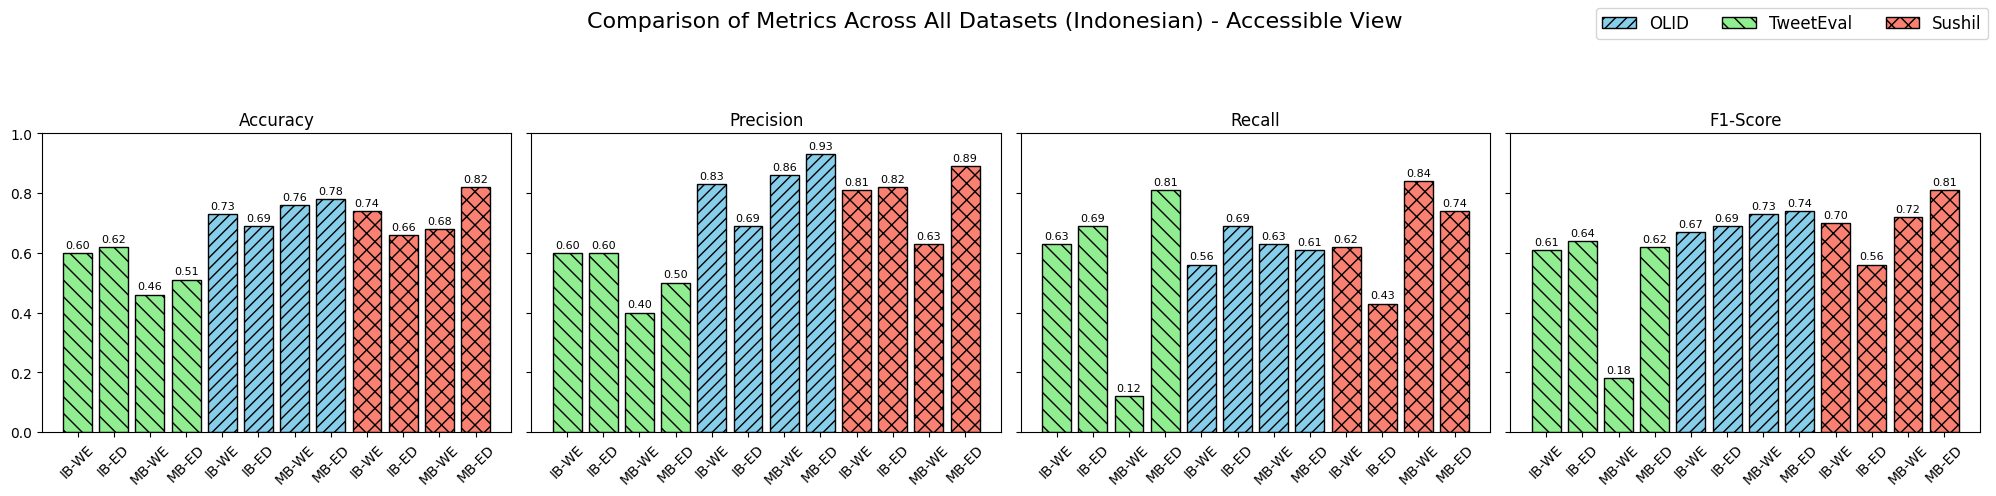

In [14]:
plot_colored_metrics_accessible(df_indo, 'Indonesian')

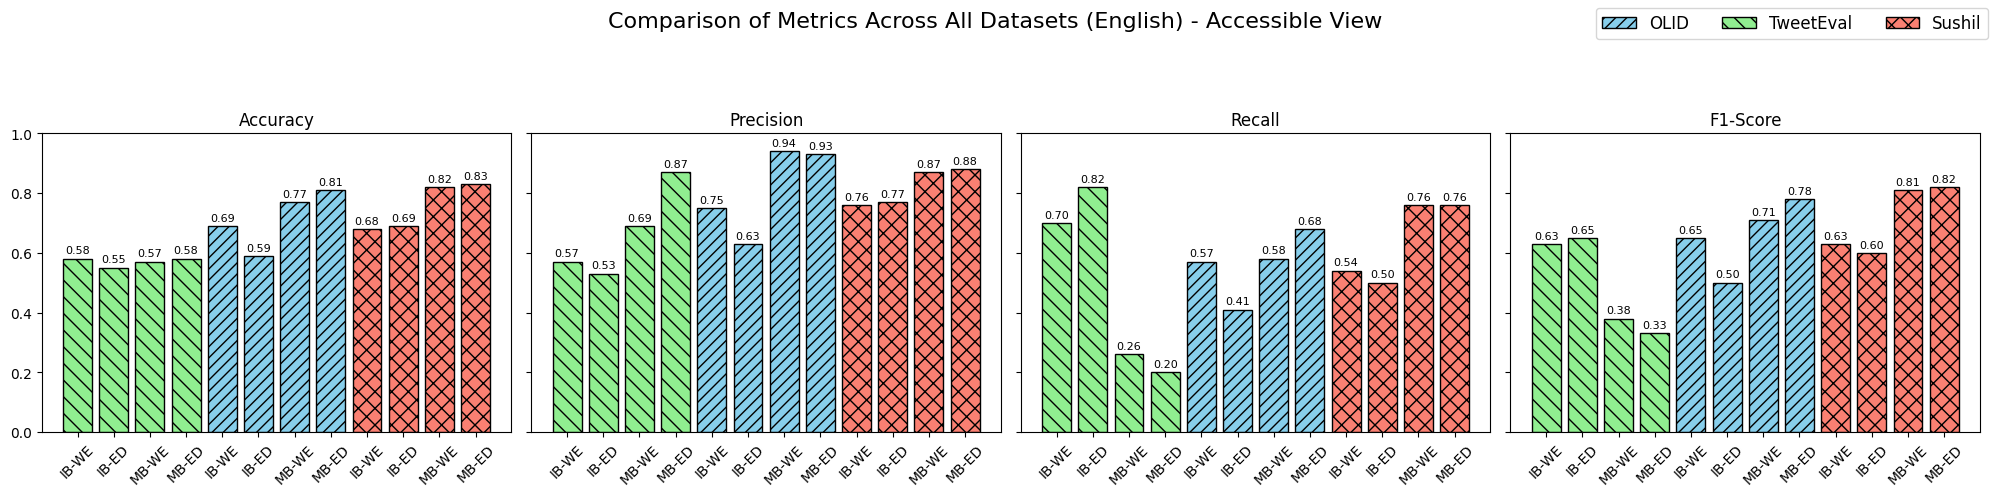

In [15]:
plot_colored_metrics_accessible(df_english, 'English')